In [101]:
# Core Libraries
import numpy as np  # Numerical computations
import pandas as pd  # Data manipulation and analysis

# Data Vizualiation
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Statistical data visualization

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder  # Data scaling and encoding
from sklearn.model_selection import train_test_split  # Splitting data into train/test sets

# Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression  # Regression models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # Decision trees
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Random forests
from sklearn.svm import SVC, SVR  # Support Vector Machines (classification and regression)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor  # k-Nearest Neighbors

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report  # Classification metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score  # Advanced classification metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\User\Desktop\10Alytics\Machine Learning\heart - heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA

In [5]:
# Inspect the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [13]:
# Check for missing values
print("Missing values:", df.isnull().sum())

Missing values: age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
# Describe dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Univariate Analysis

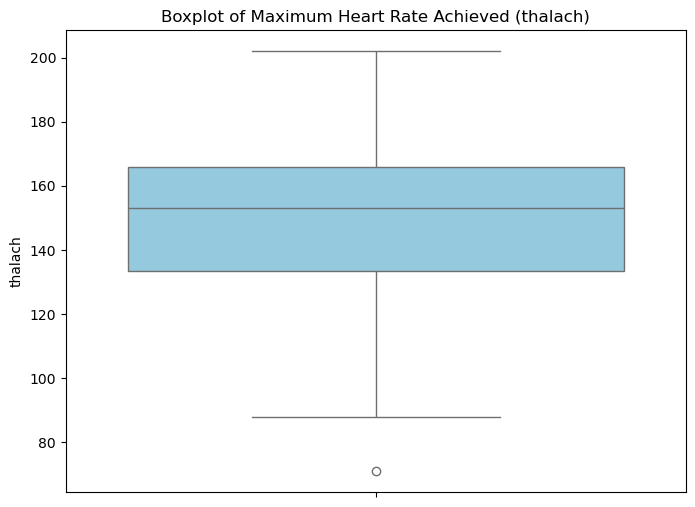

In [17]:
# Visualize the outliers in 'thalach' using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='thalach', color='skyblue')
plt.title('Boxplot of Maximum Heart Rate Achieved (thalach)')
plt.ylabel('thalach')
plt.show()

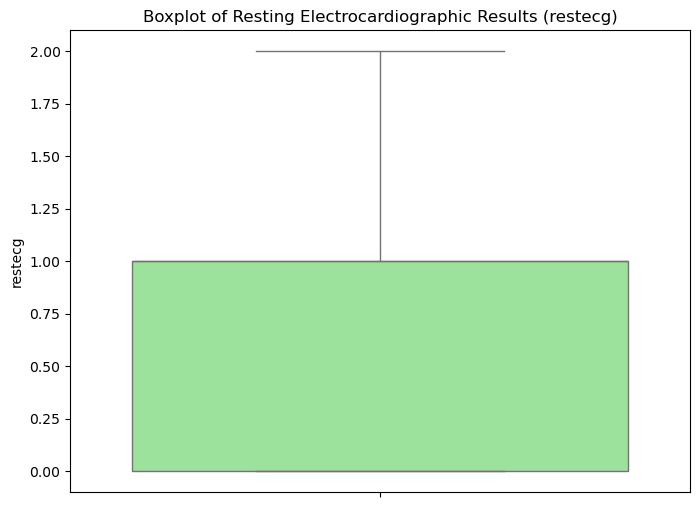

In [21]:
# Visualize the outliers in 'restecg' using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='restecg', color='lightgreen')
plt.title('Boxplot of Resting Electrocardiographic Results (restecg)')
plt.ylabel('restecg')
plt.show()


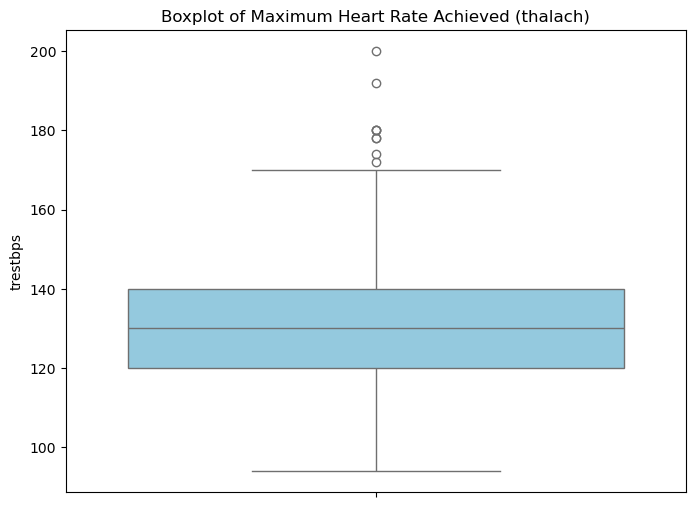

In [25]:
# Visualize the outliers in 'trestbps' using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='trestbps', color='skyblue')
plt.title('Boxplot of Maximum Heart Rate Achieved (thalach)')
plt.ylabel('trestbps')
plt.show()

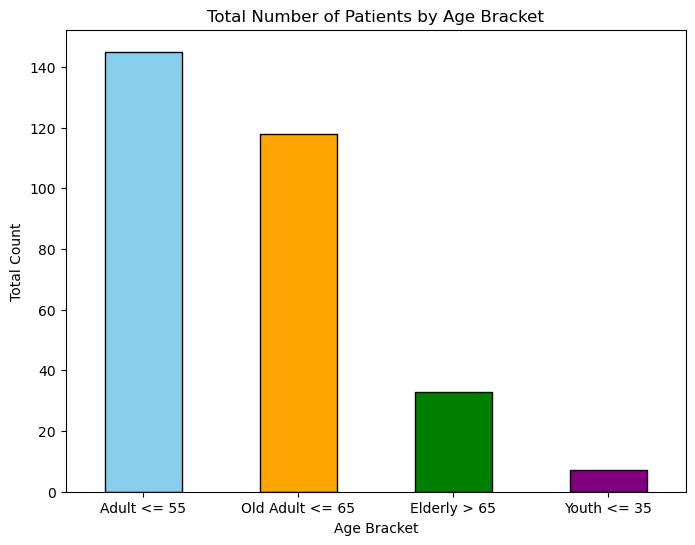

In [29]:
# Define the function to categorize age into brackets
def age_bracket(age):
    if age <= 35:
        return "Youth <= 35"
    elif age <= 55:
        return "Adult <= 55"
    elif age <= 65:
        return "Old Adult <= 65"
    else:
        return "Elderly > 65"

# Create a new column 'Age_bracket' in the DataFrame
df['Age_bracket'] = df['age'].apply(age_bracket)

# Group data by 'Age_bracket' and count the total number of patients in each group
age_bracket_count = df['Age_bracket'].value_counts()

# Visualize the total number of patients by age bracket
plt.figure(figsize=(8, 6))
age_bracket_count.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple'], edgecolor='black')
plt.title('Total Number of Patients by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.show()


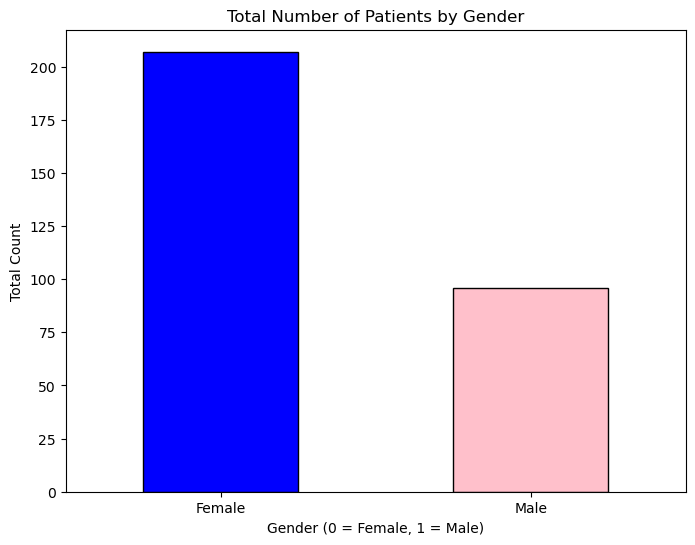

In [31]:
# Group data by 'sex' and count the total number of patients by gender
gender_count = df['sex'].value_counts()

# Visualize the total number of patients by gender
plt.figure(figsize=(8, 6))
gender_count.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')
plt.title('Total Number of Patients by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Total Count')
plt.xticks([0, 1], labels=['Female', 'Male'], rotation=0)
plt.show()


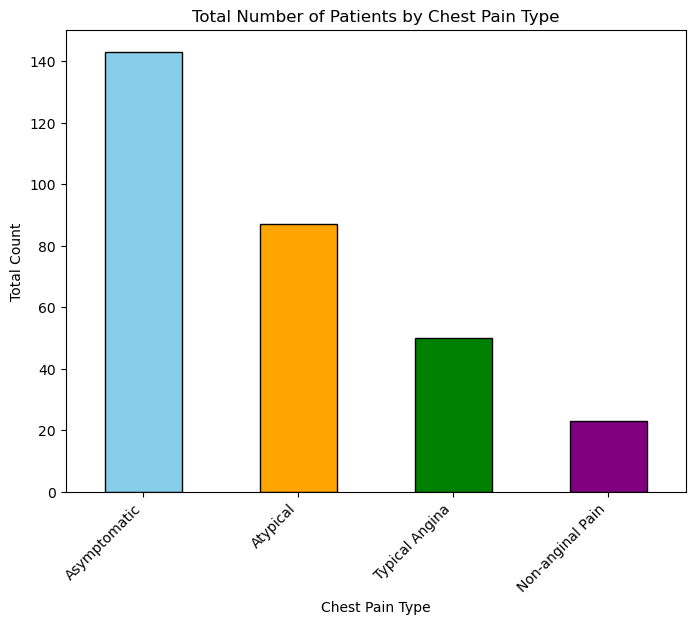

In [35]:
# Map chest pain type values to descriptive labels
cp_mapping = {
    0: "Asymptomatic",
    1: "Typical Angina",
    2: "Atypical",
    3: "Non-anginal Pain"
}

# Replace the values in the 'cp' column with descriptive labels
df['cp'] = df['cp'].map(cp_mapping)

# Group data by the updated 'cp' column and count the total number of patients
chest_pain_count = df['cp'].value_counts()

# Visualize the total number of patients by chest pain type
plt.figure(figsize=(8, 6))
chest_pain_count.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple'], edgecolor='black')
plt.title('Total Number of Patients by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.show()


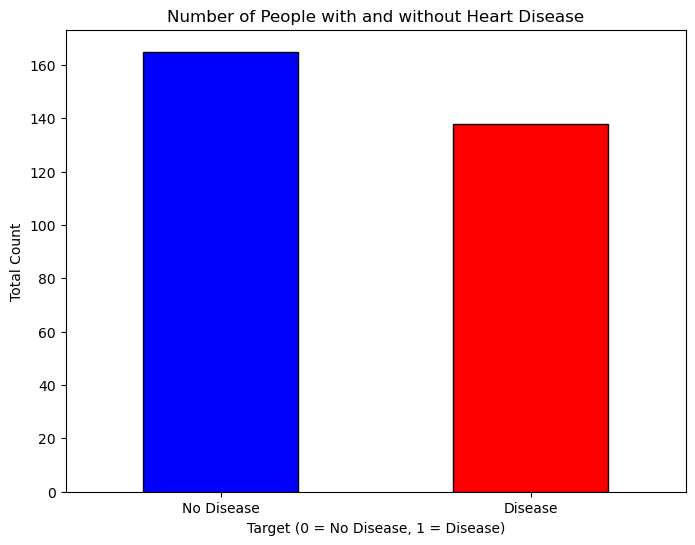

In [37]:
# Group data by 'target' (0 = No Disease, 1 = Disease) and count the total number of patients
disease_count = df['target'].value_counts()

# Visualize the total number of people with and without heart disease
plt.figure(figsize=(8, 6))
disease_count.plot(kind='bar', color=['blue', 'red'], edgecolor='black')
plt.title('Number of People with and without Heart Disease')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Total Count')
plt.xticks([0, 1], labels=['No Disease', 'Disease'], rotation=0)
plt.show()


### Bivariate Analysis

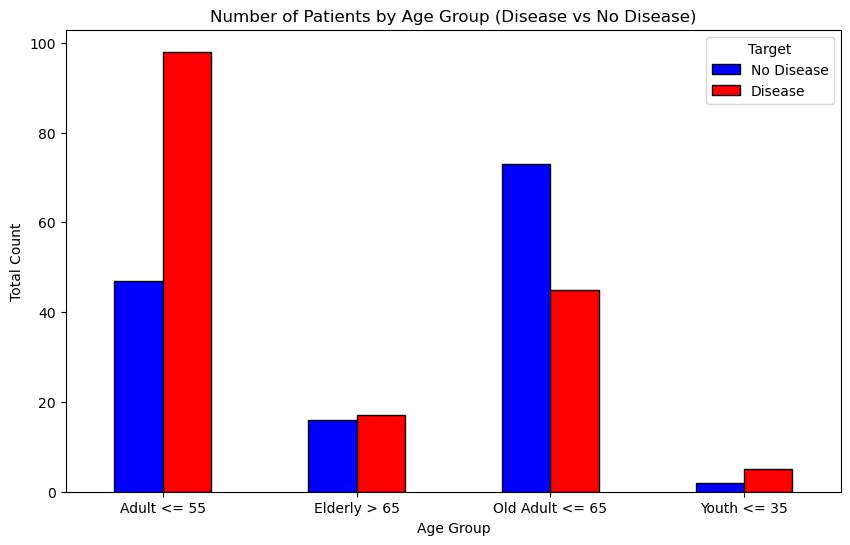

In [46]:
# Group data by 'Age_bracket' and 'target' and count the number of patients
age_group_target = df.groupby(['Age_bracket', 'target']).size().unstack()

# Visualize Disease and No Disease side by side
age_group_target.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'], edgecolor='black')
plt.title('Number of Patients by Age Group (Disease vs No Disease)')
plt.xlabel('Age Group')
plt.ylabel('Total Count')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.xticks(rotation=0)
plt.show()


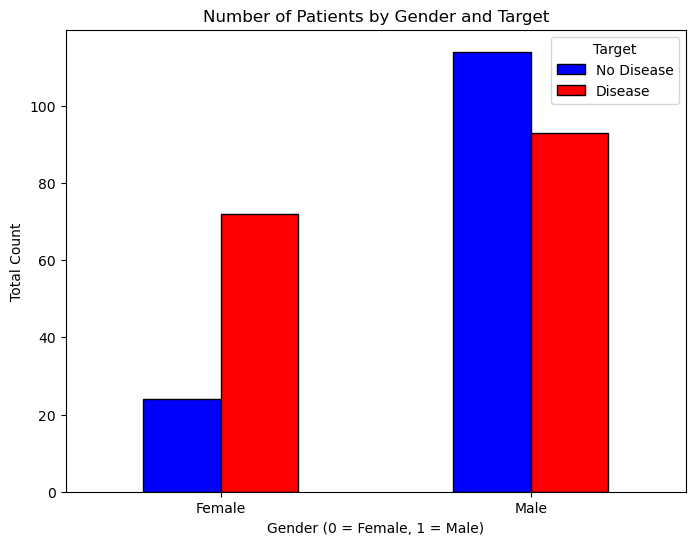

In [48]:
# Group data by 'sex' and 'target' and count the number of patients
gender_target = df.groupby(['sex', 'target']).size().unstack()

# Visualize the number of patients by gender and target
gender_target.plot(kind='bar', figsize=(8, 6), color=['blue', 'red'], edgecolor='black')
plt.title('Number of Patients by Gender and Target')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Total Count')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.xticks([0, 1], labels=['Female', 'Male'], rotation=0)
plt.show()


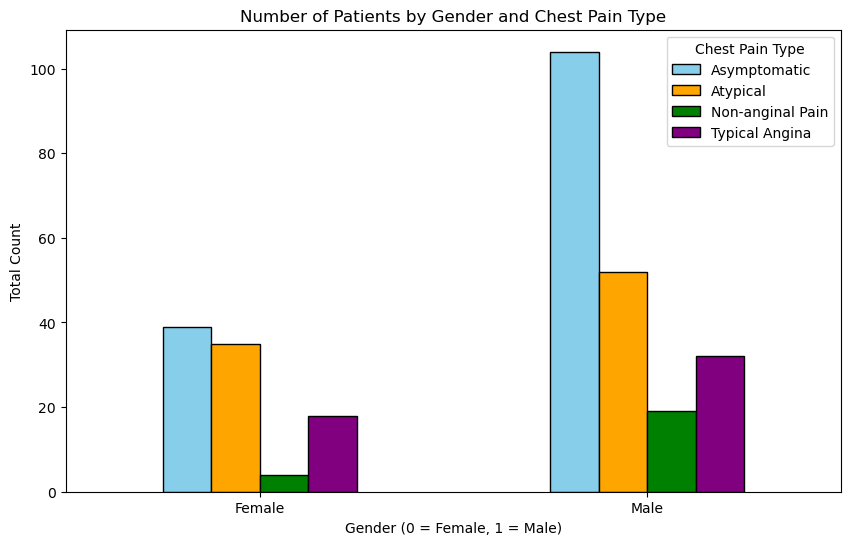

In [50]:
# Group data by 'sex' and 'cp' (chest pain type) and count the number of patients
gender_cp = df.groupby(['sex', 'cp']).size().unstack()

# Visualize the number of patients by gender and chest pain type
gender_cp.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'green', 'purple'], edgecolor='black')
plt.title('Number of Patients by Gender and Chest Pain Type')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Total Count')
plt.legend(title='Chest Pain Type')
plt.xticks([0, 1], labels=['Female', 'Male'], rotation=0)
plt.show()


### Multivariate Analysis

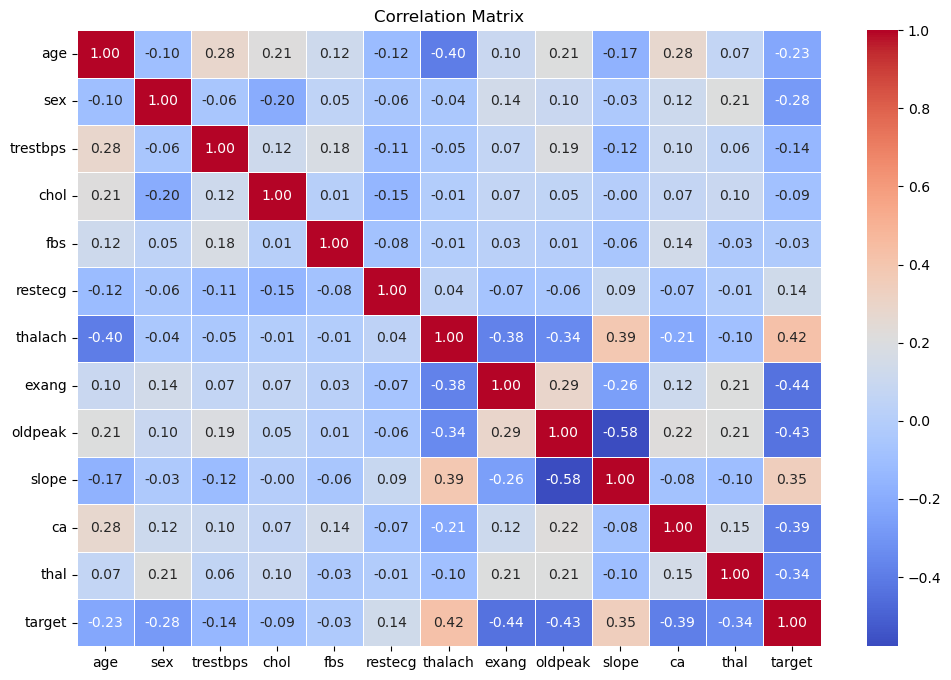

In [59]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## Preprocessing

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    int64  
 1   sex          303 non-null    int64  
 2   cp           303 non-null    object 
 3   trestbps     303 non-null    int64  
 4   chol         303 non-null    int64  
 5   fbs          303 non-null    int64  
 6   restecg      303 non-null    int64  
 7   thalach      303 non-null    int64  
 8   exang        303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    int64  
 11  ca           303 non-null    int64  
 12  thal         303 non-null    int64  
 13  target       303 non-null    int64  
 14  Age_bracket  303 non-null    object 
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


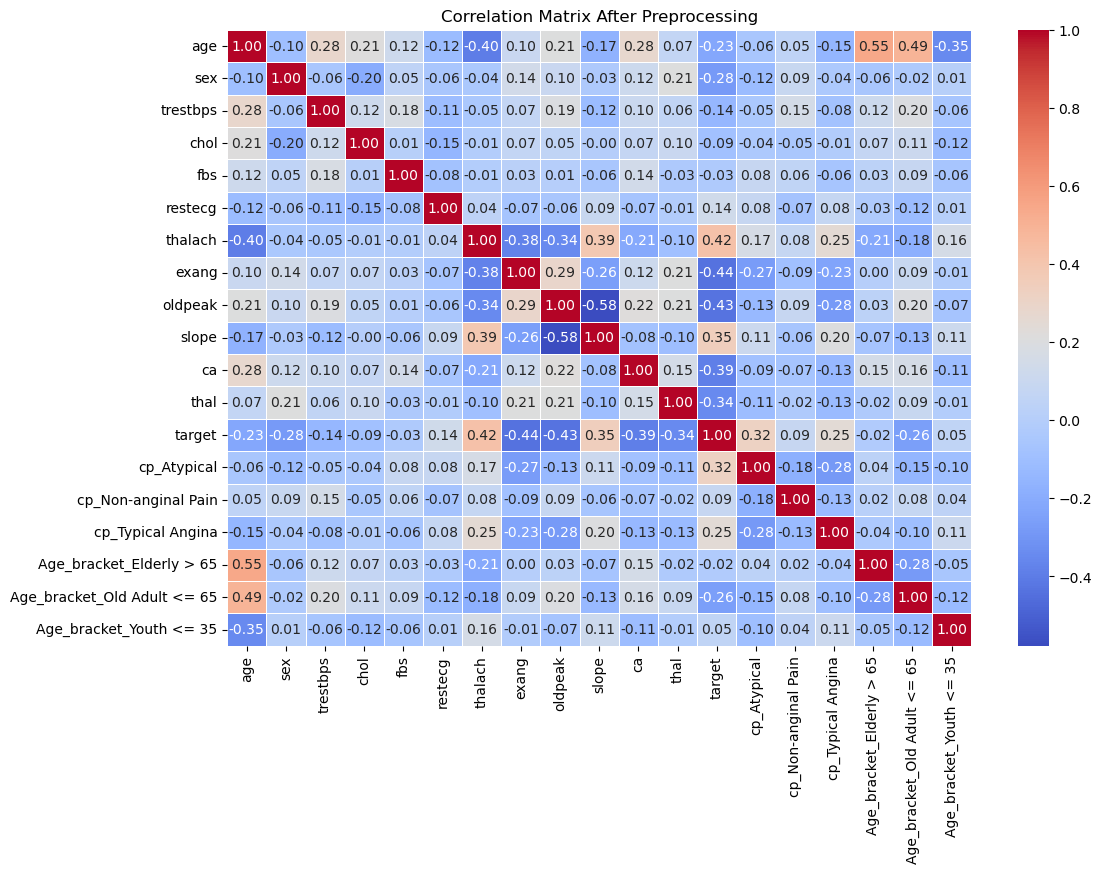

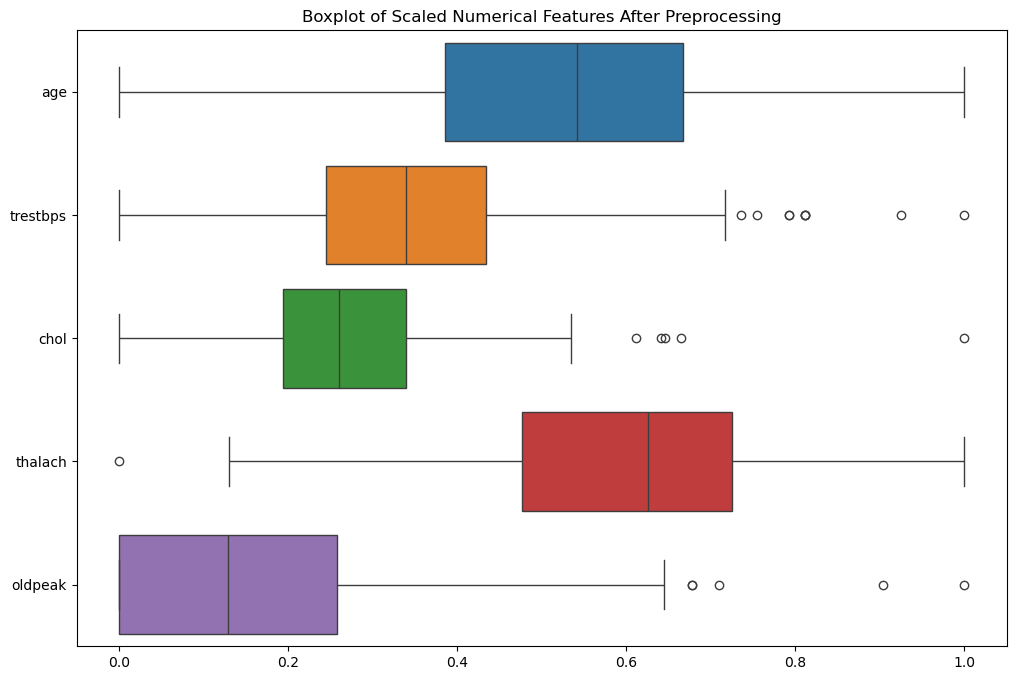

Preprocessed Dataset:
        age  sex  trestbps      chol  fbs  restecg   thalach  exang   oldpeak  \
0  0.708333    1  0.481132  0.244292    1        0  0.603053      0  0.370968   
1  0.166667    1  0.339623  0.283105    0        1  0.885496      0  0.564516   
2  0.250000    0  0.339623  0.178082    0        0  0.770992      0  0.225806   
3  0.562500    1  0.245283  0.251142    0        1  0.816794      0  0.129032   
4  0.583333    0  0.245283  0.520548    0        1  0.702290      1  0.096774   

   slope  ca  thal  target  cp_Atypical  cp_Non-anginal Pain  \
0      0   0     1       1        False                 True   
1      0   0     2       1         True                False   
2      2   0     2       1        False                False   
3      2   0     2       1        False                False   
4      2   0     2       1        False                False   

   cp_Typical Angina  Age_bracket_Elderly > 65  Age_bracket_Old Adult <= 65  \
0              False       

In [67]:
# 1. Encode Categorical Variables
categorical_columns = ['cp', 'Age_bracket']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# 2. Normalize Numerical Variables
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# 3. Visualize Correlation Matrix After Preprocessing
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix After Preprocessing")
plt.show()

# 4. Visualize Scaled Numerical Features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns], orient="h")
plt.title("Boxplot of Scaled Numerical Features After Preprocessing")
plt.show()

# Display the first few rows of the preprocessed dataset
print("Preprocessed Dataset:")
print(df.head())

## Model Building

In [71]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('target', axis=1)  # Drop the target column to get features
y = df['target']  # Target column

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (242, 18)
Testing Features Shape: (61, 18)
Training Target Shape: (242,)
Testing Target Shape: (61,)


In [83]:
# Train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

# Display evaluation metrics
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display the full classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Results:
Accuracy: 0.85
Precision: 0.80
Recall: 0.97
F1 Score: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.82        28
           1       0.80      0.97      0.88        33

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.85        61
weighted avg       0.87      0.85      0.85        61


Confusion Matrix:
 [[20  8]
 [ 1 32]]


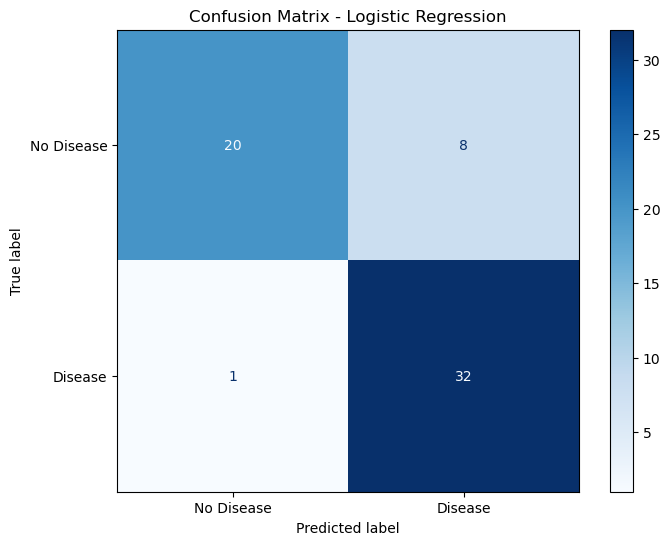

In [105]:
# Generate the confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues", values_format='d', ax=plt.gca())
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [85]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Display evaluation metrics
print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

# Optional: Display the full classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.79
Precision: 0.76
Recall: 0.88
F1 Score: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61


Confusion Matrix:
 [[19  9]
 [ 4 29]]


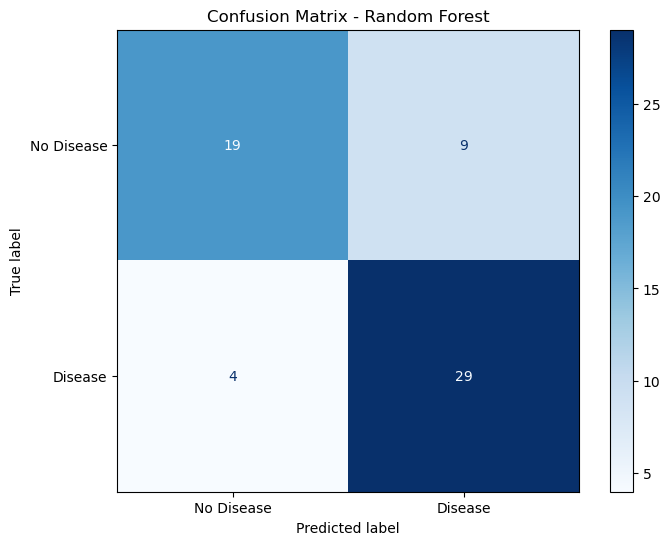

In [107]:
# Generate the confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues", values_format='d', ax=plt.gca())
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [87]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Display evaluation metrics
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")

# Optional: Display the full classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Results:
Accuracy: 0.70
Precision: 0.71
Recall: 0.76
F1 Score: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.64      0.67        28
           1       0.71      0.76      0.74        33

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61


Confusion Matrix:
 [[18 10]
 [ 8 25]]


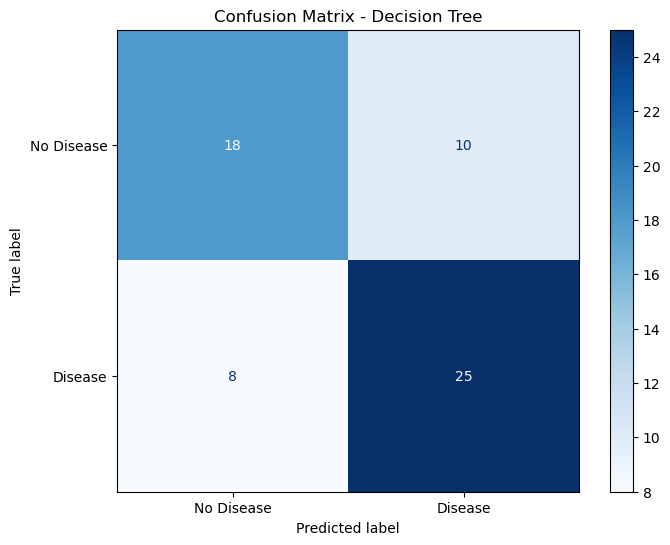

In [109]:
# Generate the confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues", values_format='d', ax=plt.gca())
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [111]:
# Initialize a results dictionary
results = {}

# Logistic Regression
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
results['Logistic Regression'] = [log_accuracy, log_precision, log_recall, log_f1]

# Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
results['Random Forest'] = [rf_accuracy, rf_precision, rf_recall, rf_f1]

# Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
results['Decision Tree'] = [dt_accuracy, dt_precision, dt_recall, dt_f1]

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T

# Display the results
print("Model Performance Metrics:")
print(results_df)

Model Performance Metrics:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.852459   0.800000  0.969697  0.876712
Random Forest        0.786885   0.763158  0.878788  0.816901
Decision Tree        0.704918   0.714286  0.757576  0.735294


In [125]:
# Convert the results into percentages
results_percentage = results_df * 100

# Style and display the table
styled_table = results_percentage.style.format("{:.2f}%").background_gradient(cmap="coolwarm").set_caption("Model Performance Metrics (Percentage)")

# Display the styled table 
styled_table

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,85.25%,80.00%,96.97%,87.67%
Random Forest,78.69%,76.32%,87.88%,81.69%
Decision Tree,70.49%,71.43%,75.76%,73.53%


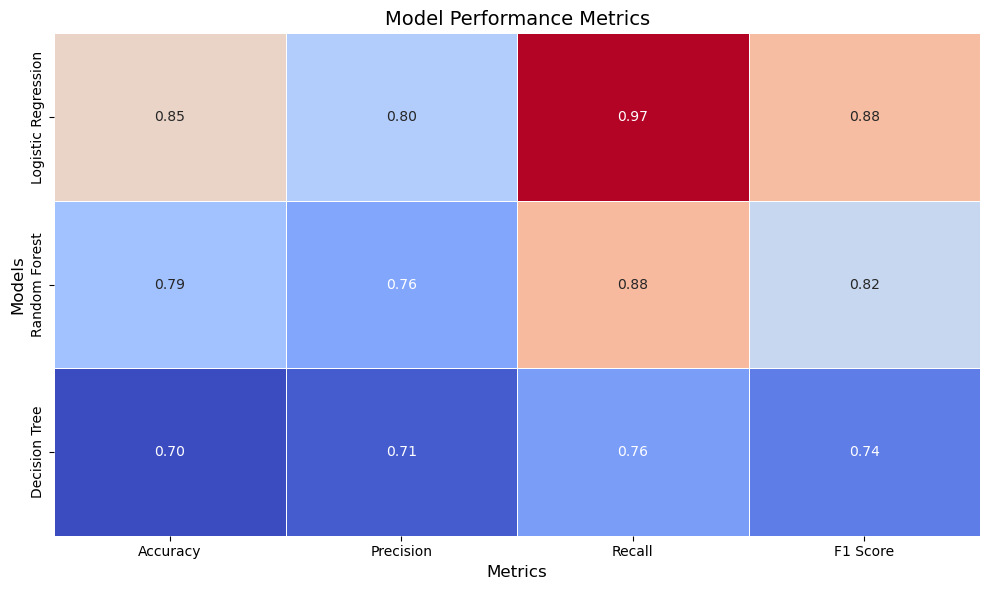

In [115]:
# Plot the performance metrics as a heatmap for better tabular display
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title("Model Performance Metrics", fontsize=14)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()